# Building an API with FastAPI

In this workbook we will building a relatively simple API and serving it on our local machine (localhost). People have built APIs with Python for some time, and packages such as _flask_ have been popular for doing so. However, in the last couple of years _FastAPI_ has become a very popular solution for this, and will be our chosen package. We need to begin by installing as normal:

In [2]:
!pip install "fastapi[all]"

  Using cached fastapi-0.70.1-py3-none-any.whl (51 kB)
  Using cached itsdangerous-2.0.1-py3-none-any.whl (18 kB)
  Using cached python-multipart-0.0.5.tar.gz (32 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ujson-4.3.0-cp310-cp310-win_amd64.whl (44 kB)
  Using cached email_validator-1.1.3-py2.py3-none-any.whl (18 kB)
  Using cached orjson-3.6.5-cp310-none-win_amd64.whl (181 kB)
  Using cached dnspython-2.1.0-py3-none-any.whl (241 kB)
  Using cached httptools-0.2.0.tar.gz (169 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for python-multipart, since package 'wheel' is not installed.
Using legacy 'setup.py install' for httptools, since package 'wheel' is not installed.
    Running setup.py install for httptools: started
    Running setup.py install for httptools: finished with status 'error'


    ERROR: Command errored out with exit status 1:
     command: 'C:\Python\Python310\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\empjb\\AppData\\Local\\Temp\\pip-install-jlrhfl8u\\httptools_46b1e887d9fe4480b31722663bd526da\\setup.py'"'"'; __file__='"'"'C:\\Users\\empjb\\AppData\\Local\\Temp\\pip-install-jlrhfl8u\\httptools_46b1e887d9fe4480b31722663bd526da\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\empjb\AppData\Local\Temp\pip-record-k262_9nt\install-record.txt' --single-version-externally-managed --compile --install-headers 'C:\Python\Python310\Include\httptools'
         cwd: C:\Users\empjb\AppData\Local\Temp\pip-install-jlrhfl8u\httptools_46b1e887d9fe4480b31722663bd526da\
    Complet

Next, we will make some data that can be served from our API:

In [2]:
from fastapi import FastAPI

datastore = {1001: {"name": "Jordan Bruno", "teacher_rank": 7},
            1002: {"name": "Liping Zheng", "teacher_rank": 2}, 
            1003: {"name": "Michael Mortenson", "teacher_rank": 5}
            }

After importing the package we build a simple data dictionary with three staff members each of which have an ID, name and their overall ranking as a teacher as maintained by WMG (as of 2021/12/02). Of course, in practice we would use a proper datastore of some kind, but this will be enough to serve our purposes. Our next task is to build some basic API functionality: 

In [3]:
app = FastAPI()

@app.get("/all")
async def get_all():
	return datastore

Our code starts by declaring a variable "app" as a _FastAPI_ object. Having done this we can link further code to this object using decorators. This is shown in the line:

_\@app.get("/all")_

Here we do a few things. Firstly the _@app_ part acts as our decorator _(@{variable}_ means we are declaring the below function as a part of the variable given). Secondly we specify our function will work for any GET request to our given endpoint (URL). Lastly we specify the path element from our endpoint (the bit that comes after our domain) that we associate with this request. In this case we will trigger this function anytime a user hits the endpoint _/all_. I.e. if our domain was _api.bdtv.com_ this function triggers anytime someone calls _https://api.bdtv.com/all._

Underneath our decorator we specify a function much like we have in the bootcamp previously. There is one difference in our fist line which is that we declare this to be an asynchronus function with _async._ This is not really necessary for this particular task but it is usually good practice. In the most simplistic terms, _async_ just tells the computer that the function may take some time and that it can work on other tasks while waiting. See more [here](https://fastapi.tiangolo.com/async/#in-a-hurry). Finally we have a return statement, which in this case tells the API to return all data in the datastore.

While a useful function, in practice we would more likely want users to be able to select specific data rather than everything, and we can do this by having them pass information (e.g. ids, names, etc.) in the request (the endpoint).

In [4]:
@app.get("/ids/{id}")
async def get_by_id(id: int):
	try:
		return datastore[id] # subset the dictionary by the ID
	except:
		return "No records found" # return if key does not exist

Much of this is unchanged except we now have a changable variable ("id") which can be used to specify a particular staff member. This forms part of the endpoint (the text of the API call - shown as "{id}" in the decorator command). It also is used in the function as an expected parameter - "(id)", which we delare as an int (rather than string as it would be in the endpoint path) - and also then in the _return_ statement to filter the _database_ dictionary. (Note we also use _try_ and _except_ to deal with the possible case of someone submitting an ID which is not in our database). 

In other words, a user can make a call to

_https://api.bdtv.com/ids/1003_

and expect to see the following data returned:

_name: Michael Mortenson<br>teacher_rank: 5_

We can build on this concept by creating slightly more complicated functions to subset the dictionary. Such as:

In [5]:
@app.get("/names/{name}")
async def get_by_name(name):
	output = "No records found" # placeholder if no value matched
	for sid in datastore:
		if datastore[sid]['name'] == name: # match by the name value
			output = datastore[sid] # replace placeholder with record
	return output

Ultimately we have the same process here, the only change is that we need to match a value which is nested in the dictionary. We achieve this by looping through the dictionary until we can match the "name". Note that this is not necessarily the most efficient way to do this (we could use list comprehension or similar) and also we will have issues if there is more than one record with the same name (in this case only the last record will be displayed). However, it will work for our purposes.

We can put all this code together (as below). We want this code to be run as a standalone Python file (outside of Jupyter). We could save from here or copy and paste into a text/code editor and save from there. However, the easiest route is to take the Python file ("staffapp.py") from the Github and saving it to a location on our machine. It will be easiest to create a new folder and add this file - while noting the path directory (in my case "C:/Users/u4033/fastapi") as we need it in the next task.

In [6]:
from fastapi import FastAPI

datastore = {1001: {"name": "Jordan Bruno", "teacher_rank": 7},
			1002: {"name": "Liping Zheng", "teacher_rank": 2}, 
			1003: {"name": "Michael Mortenson", "teacher_rank": 5}
			}

app = FastAPI()

@app.get("/all")
async def get_all():
	return datastore

@app.get("/ids/{id}")
async def get_by_id(id: int):
	try:
		return datastore[id] # subset the dictionary by the ID
	except:
		return "No records found" # return if key does not exist
	
@app.get("/names/{name}")
async def get_by_name(name):
	output = "No records found" # placeholder if no value matched
	for sid in datastore:
		if datastore[sid]['name'] == name: # match by the name value
			output = datastore[sid] # replace placeholder with record
	return output

We now will run our app as a remote API we can make calls to. We can do this with _uvicorn_ - a basic webserver for _FastAPI_ - that we installed earlier as part of the _FastAPI_ package. However, this is not something we can inside of Notebooks. You will need instead to switch to __Command Prompt in Windows__ or __Terminal in Mac__. Search for this on your machine and launch it.

First of all we need to navigate to the folder we created earlier (in my case "C:/Users/u4033/fastapi"). We can do this in either _Command Prompt_ or _Terminal_ (same code) with the _cd_ (which stands for "change directory") command. 

_Note the next code is not to be run in a Notebook but from the Command Prompt or Terminal_

In [ ]:
cd C:/Users/u4033/fastapi

Next we can runn the app:

In [ ]:
python -m uvicorn staffapp:app --reload

If the code has worked you should see something like the following:

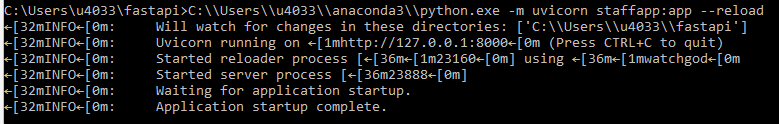

We will interact with the API in the next step.

If you have errors you may need to specify the version of Python to use (the one we are using in our Notebooks). You can find that using the _sys_ module:

In [7]:
import sys
sys.executable

'C:\\Users\\u4033\\anaconda3\\python.exe'

This can be copied into the above code - so in my case it would be:

In [ ]:
C:/Users/u4033/anaconda3/python.exe -m uvicorn staffapp:app --reload

Any other problems report to us and we will try to resolve them!

Having started the application we can navigate to it via our browser (the app is running on _localhost_ - i.e. running on our machine). Type in _localhost:8000/all_ into your browser of choice and you should see something like this:

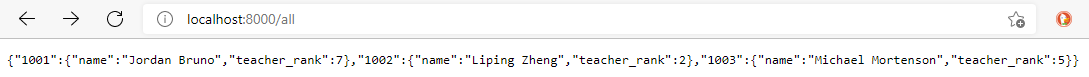

Type in _localhost:8000/ids/1002_ and you should see:

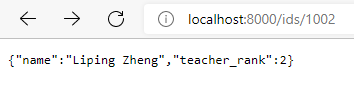

And finally type _localhost:8000/names/Michael%20Mortenson_ (note the use of _%20_ to represent the space between names as in a previous session) and you should see:

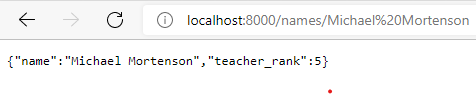

We have built a working API! Well done :)